In [1]:
import pandas as pd
import numpy as np
import twitter
import matplotlib.pyplot as plt
import csv
#import time
import sys
import re
import requests
import json
import time
import sys
import seaborn as sns
from matplotlib import cm as CM
from matplotlib import mlab as ML

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
new_columns =['PROPERTY Boro-Block-Lot','PROPERTY Condo Section',\
              'PROPERTY Address','PROPERTY Neighborhood',\
              'PROPERTY Building Classification','PROPERTY Total Units',\
              'PROPERTY Year Built','PROPERTY Gross SqFt',\
              'PROPERTY Est. Gross Income','PROPERTY Gross Income per SqFt',\
              'PROPERTY Full Market Value','PROPERTY Market Value per SqFt',\
              'COMPARABLE RENTAL 1 Boro-Block-Lot', 'COMPARABLE RENTAL 1 Address',\
              'COMPARABLE RENTAL 1  Neighborhood', 'COMPARABLE RENTAL 1  Building Classification',\
              'COMPARABLE RENTAL 1  Total Units', 'COMPARABLE RENTAL 1  Year Built',\
              'COMPARABLE RENTAL 1  Gross SqFt','COMPARABLE RENTAL 1  Est. Gross Income',\
              'COMPARABLE RENTAL 1  Gross Income per SqFt','COMPARABLE RENTAL 1 Full Market Value',\
              'COMPARABLE RENTAL 1  Market Value per SqFt','COMPARABLE RENTAL 1  Dist. from Coop in miles',\
              'COMPARABLE RENTAL 2  Boro-Block-Lot', 'COMPARABLE RENTAL 2  Address',\
              'COMPARABLE RENTAL 2  Neighborhood','COMPARABLE RENTAL 2  Building Classification',\
              'COMPARABLE RENTAL 2  Total Units', 'COMPARABLE RENTAL 2  Year Built',\
              'COMPARABLE RENTAL 2  Gross SqFt','COMPARABLE RENTAL 2  Est. Gross Income',\
              'COMPARABLE RENTAL 2  Gross Income per SqFt','COMPARABLE RENTAL 2  Full Market Value',\
              'COMPARABLE RENTAL 2  Market Value per SqFt','COMPARABLE RENTAL 2  Dist. from Coop in miles']
print len(new_columns)

36


In [3]:
delete_words = ['3', 'Estimated Expense', 'Expense per SqFt', 'Net Operating Income']

In [ ]:
areas = ['Queens', 'Brooklyn', 'Manhattan', 'Staten_Island', 'Bronx']
years = ['2008_2009', '2009_2010', '2010_2011', '2011_2012']
dfs = []
for area in areas:
    for year in years:
        URL = 'Data/All/DOF__Condominium_Comparable_Rental_Income___' + area + '___FY_' + year + '.csv'
        tmp = pd.read_csv(URL, sep=',')
        if (len(tmp.columns)>36):
            delete_columns = []
            for i in tmp.columns:
                for j in delete_words:
                    if j in i:
                        delete_columns.append(i)
            tmp.drop(delete_columns, axis=1, inplace=True)
            #print tmp.columns
        #print tmp.columns
        tmp.columns = new_columns
        dfs.append(tmp)

In [2]:
df = pd.read_csv('condominium.csv', sep=',')

In [249]:
#processed_locs = dict()
def get_coords_by_address(address):
    address.replace(' ', '+')
    request = 'http://maps.google.com/maps/api/geocode/json?address='+address+'+new+york'+'&sensor=false'
    try:
        if processed_locs.has_key(address):
            return processed_locs[address]
        r = requests.get(request)
        j = json.loads(r.content)
        respond = j['results'][0]['geometry']
        if (j['status']=='OVER_QUERY_LIMIT'):
            print "Sleeping for 2 sec"
            time.sleep(2)
            j = json.loads(r.content)
        loc = [respond['location']['lat'], respond['location']['lng'], respond['location_type']]
        processed_locs[address] = loc
        return loc
    except Exception as e:
        print e
        print j
        if (j['status']=='OVER_QUERY_LIMIT'):
            try:
                print "Sleeping for 2 sec"
                time.sleep(2)
                r = requests.get(request)
                j = json.loads(r.content)
                respond = j['results'][0]['geometry']
                loc = [respond['location']['lat'], respond['location']['lng'], respond['location_type']]
                processed_locs[address] = loc
                return loc
            except Exception as e:
                print "2nd exception"
                print e
                return [0, 0, 'null']
    

In [99]:
df.loc[no_coords[2500]]["PROPERTY Address"]


'2681 BROADWAY'

In [109]:
len(np.load("no_crds_750.npy"))

750

In [ ]:
no_crds = []
bound = 4001
i=bound
for j in no_coords[bound:]:
    addr = df.loc[j]["PROPERTY Address"]
    print i
    
    if i%250==0:
        np.save("no_crds_"+str(i), no_crds)
        no_crds = []
    i+=1
    no_crds.append(get_coords_by_address(addr))

In [179]:
all_coords = []
for i in xrange(250, 6501, 250):
    filename = "no_crds_"+str(i)+".npy"
    tmp = np.array(np.load(filename))
    print shape(tmp)
    print len(all_coords)
    all_coords.append(tmp)
    

(250L, 3L)
0
(250L, 3L)
1
(250L, 3L)
2
(250L, 3L)
3
(250L,)
4
(250L, 3L)
5
(249L,)
6
(250L,)
7
(250L,)
8
(250L, 3L)
9
(250L, 3L)
10
(250L,)
11
(250L, 3L)
12
(250L, 3L)
13
(250L, 3L)
14
(250L,)
15
(249L, 3L)
16
(250L, 3L)
17
(250L, 3L)
18
(250L, 3L)
19
(250L, 3L)
20
(250L, 3L)
21
(250L, 3L)
22
(250L,)
23
(250L, 3L)
24
(250L,)
25


In [177]:
list_of_tuples = np.load("no_crds_1250.npy")
list_of_lists = []
for i in list_of_tuples:
    #print i
    if i!=None:
        list_of_lists.append(list(i))
    else:
        list_of_lists.append([0,0,"null"])

In [183]:
all_coords2 = []
for i in all_coords:
    if len(shape(i))<2:
        list_of_lists = []
        for j in i:
            #print i
            if j!=None:
                list_of_lists.append(list(j))
            else:
                list_of_lists.append([0,0,"null"])
        all_coords2.append(list_of_lists)
    else:
        all_coords2.append(i)

In [281]:
refresh = []
for i,j in enumerate(all_coords2):
    print shape(all_coords2[i])


(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(249L,)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)


In [283]:
shape(all_coords[16])

(249L, 3L)

In [251]:
refreshed = []
for i in refresh:
    for j in xrange(i*250, i*250+250):
        print j
        addr = df.loc[no_coords[j]]["PROPERTY Address"]
        refreshed.append(get_coords_by_address(addr))

1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699


In [253]:
len(refreshed)

500

In [256]:
all_coords2[refresh[1]]=refreshed[251:500]

In [266]:
result = np.concatenate(all_coords2, axis=0).shape

ValueError: all the input arrays must have same number of dimensions

In [272]:
for i in all_coords2:
    print shape(i)

(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(249L,)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)
(250L, 3L)


In [30]:
addresses = df['PROPERTY Address']

In [5]:
lat, lng = map(float, addresses[0].split('\n')[2].strip('()').split(','))
print lng, lat

-73.9007588598 40.8158575249


In [26]:
df["District"][0]

'Bronx'

In [67]:
coords = []
no_coords = []
for i in xrange(len(addresses)):
    spl = addresses[i].split('\n')
    sys.stdout.write('\rAddr %.5f ' % (float(i)/len(addresses)))
    if len(spl)>2 and len(spl[2])!=0:
        lat, lng = map(float, spl[2].strip('()').split(','))
        coords.append([i, lat, lng])
    else:
        lat = 0
        lng = 0
        no_coords.append(i)

Addr 0.99988 

In [51]:
df.loc[no_coords[4500]]

Unnamed: 0                                        6302
District                                      Brooklyn
PROPERTY Address                     5 ROEBLING STREET
PROPERTY Boro-Block-Lot                   3-02300-7501
PROPERTY Building Classification        R4-CONDOMINIUM
PROPERTY Condo Section                         2849-R1
PROPERTY Full Market Value                     2142000
PROPERTY Gross Income per SqFt                   25.28
PROPERTY Gross SqFt                              22096
PROPERTY Market Value per SqFt                   96.94
PROPERTY Neighborhood               WILLIAMSBURG-NORTH
PROPERTY Total Units                                20
PROPERTY Year Built                               2008
RENTAL 1 Address                       426 KEAP STREET
RENTAL 1 Boro-Block-Lot                   3-02387-0002
RENTAL 1 Building Classification           D1-ELEVATOR
RENTAL 1 Full Market Value                     5886000
RENTAL 1 Gross Income per SqFt                   30.35
RENTAL 1 G

In [230]:
len(no_coords[0:6498])

6500

In [211]:
a = np.array(coords)

In [212]:
image = plt.imread('new_york.png')

In [213]:
#ind = a[:,1]
ind = a[:,2]>-74.2
b = a[ind==True]
x = b[:,2]
y = b[:,1]

In [214]:
ind[ind==False]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False], dtype=bool)

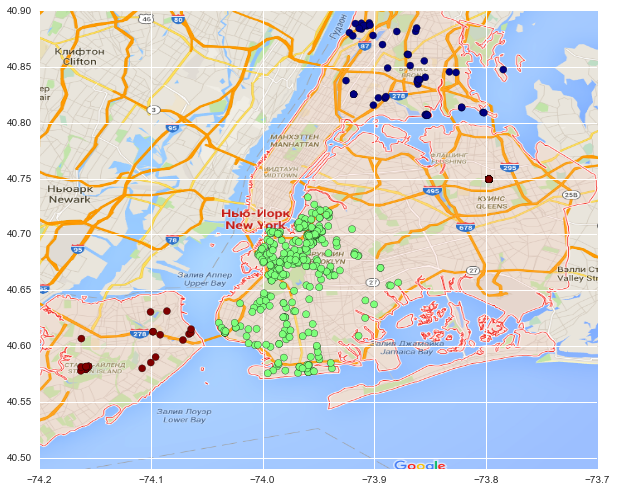

In [226]:
plt.figure(figsize=(10, 10))
plt.xlim([-74.2, -73.7])
plt.ylim([40.49, 40.9])
plt.scatter(x, y, c=colors, cmap=CM.jet, s=50)
img_bounds = (-74.272950,-73.694915, 40.489464,  40.938429)
plt.imshow(image, extent=img_bounds)
plt.show()


In [216]:
areas = df['District']
areas = areas[ind==True]

C:\Users\denilv\Anaconda2\lib\site-packages\pandas\core\internals.py:215: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8351 but corresponding boolean dimension is 719
  return self.values[slicer]
C:\Users\denilv\Anaconda2\lib\site-packages\pandas\indexes\base.py:1267: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8351 but corresponding boolean dimension is 719
  result = getitem(key)


In [217]:
cmap = np.unique(areas)
d = dict(zip(cmap,arange(len(cmap))))
colors = []
for i in areas:
    colors.append(d[i])

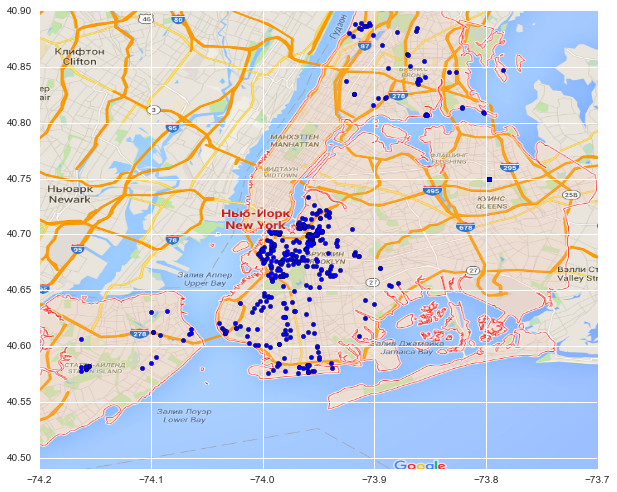

In [225]:
plt.figure(figsize=(10, 10))
plt.xlim([-74.2, -73.7])
plt.ylim([40.49, 40.9])
plt.scatter(x, y)
img_bounds = (-74.272950,-73.694915, 40.489464,  40.938429)
plt.imshow(image, extent=img_bounds)
plt.show()


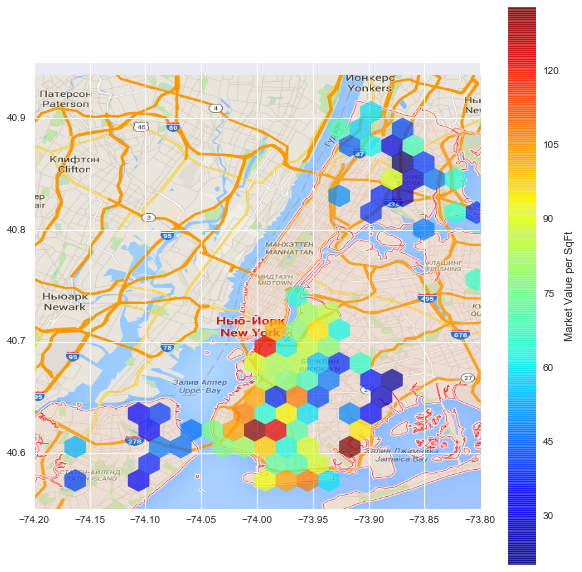

In [219]:
name = 'Market Value per SqFt'
values = df['PROPERTY ' + name]
values = np.array(values)
values = np.take(values, b[:,0].astype(int))

plt.figure(figsize=(10, 10))
plt.hexbin(x, y, C=values, gridsize=20, cmap=CM.jet, bins=None, alpha=0.7)
plt.axis([-74.2, -73.8, 40.55, 40.95])
cb = plt.colorbar()
cb.set_label(name)
plt.imshow(image, extent=img_bounds)
plt.show()   

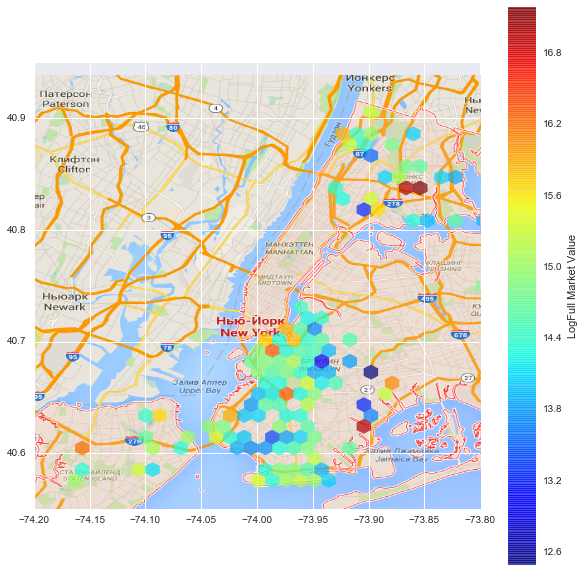

In [220]:
name = 'Full Market Value'
values = df['PROPERTY ' + name]
values = np.array(values)
values = np.take(values, b[:,0].astype(int))
values = np.log(values)
from matplotlib import cm as CM
from matplotlib import mlab as ML
plt.figure(figsize=(10, 10))
plt.hexbin(x, y, C=values, gridsize=30, cmap=CM.jet, bins=None, alpha=0.7)
plt.axis([-74.2, -73.8, 40.55, 40.95])
cb = plt.colorbar()
cb.set_label('Log' + name)
plt.imshow(image, extent=img_bounds)
plt.show()   

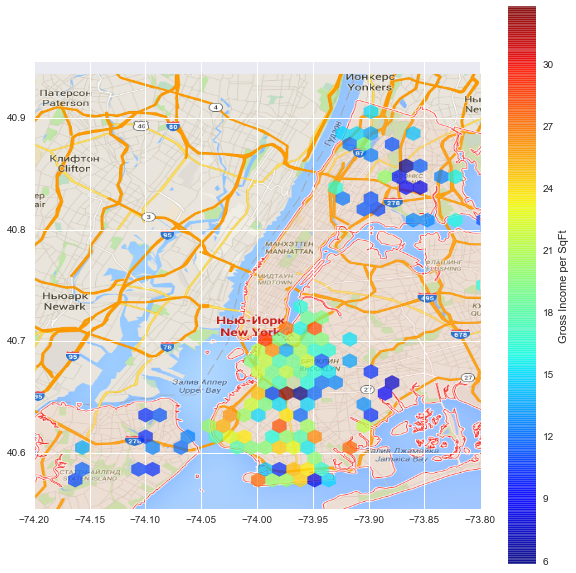

In [221]:
name = 'Gross Income per SqFt'
values = df['PROPERTY ' + name]
values = np.array(values)
values = np.take(values, b[:,0].astype(int))
from matplotlib import cm as CM
from matplotlib import mlab as ML
plt.figure(figsize=(10, 10))
plt.hexbin(x, y, C=values, gridsize=30, cmap=CM.jet, bins=None, alpha=0.7)
plt.axis([-74.2, -73.8, 40.55, 40.95])
cb = plt.colorbar()
cb.set_label(name)
plt.imshow(image, extent=img_bounds)
plt.show()   

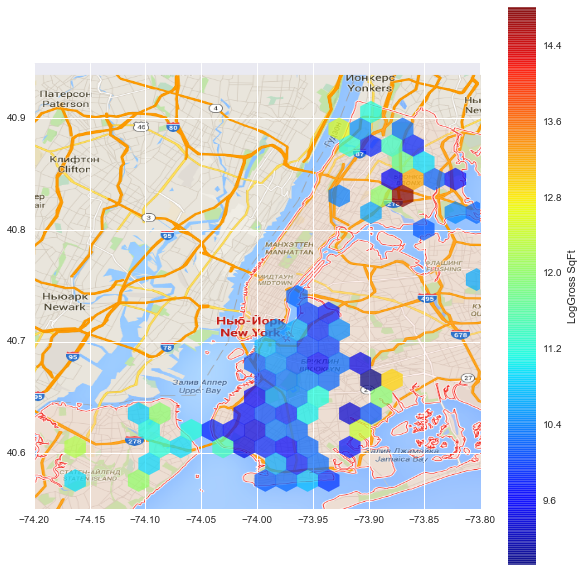

In [224]:
name = 'Gross SqFt'
values = df['PROPERTY ' + name]
values = np.array(values)
values = np.take(values, b[:,0].astype(int))
values = np.log(values)
from matplotlib import cm as CM
from matplotlib import mlab as ML
plt.figure(figsize=(10, 10))
plt.hexbin(x, y, C=values, gridsize=20, cmap=CM.jet, bins=None, alpha=0.7)
plt.axis([-74.2, -73.8, 40.55, 40.95])
cb = plt.colorbar()
cb.set_label('Log' + name)
plt.imshow(image, extent=img_bounds)
plt.show()   

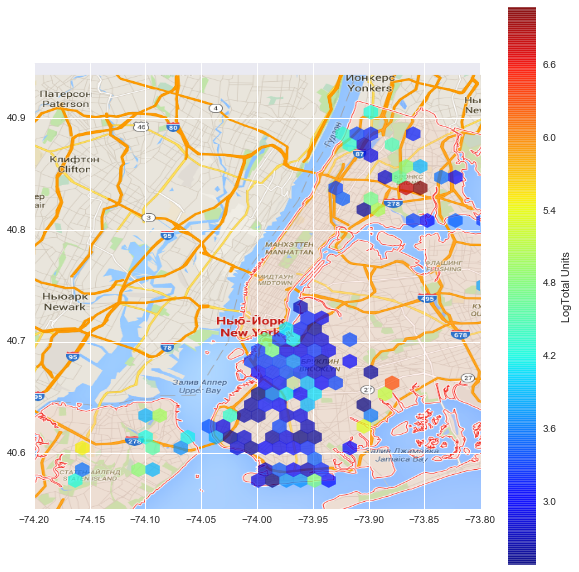

In [223]:
name = 'Total Units'
values = df['PROPERTY ' + name]
values = np.array(values)
values = np.take(values, b[:,0].astype(int))
values = np.log(values)
from matplotlib import cm as CM
from matplotlib import mlab as ML
plt.figure(figsize=(10, 10))
plt.hexbin(x, y, C=values, gridsize=30, cmap=CM.jet, bins=None, alpha=0.7)
plt.axis([-74.2, -73.8, 40.55, 40.95])
cb = plt.colorbar()
cb.set_label('Log' + name)
plt.imshow(image, extent=img_bounds)
plt.show()   